In [2]:
import os
os.environ["TORCHDYNAMO_DISABLE"] = "1"
import torch

#-----------------------------------------------------------------------------------------------------------------------------#

from configuration.config import get_config, get_parameter_config
from loaders.load_model import load_tokenizer
from generate.inference import Inference
from evaluation.reference_evaluation import bert_evaluation
from evaluation.judge_evaluation import judge_eval
from evaluation.benchmark_evaluation import BenchmarkEvaluator


#-----------------------------------------------------------------------------------------------------------------------------#
'''
config = get_config()

MODEL_NAME = config["MODEL_NAME"]

PATH = "medcare_ia_adapter"
#------------------------------------------------------------------------------------------------------------------------------#
trainer = Trainer("4bit", config)
trainer.start_trainer()
tokenizer = load_tokenizer(MODEL_NAME)
inference = Inference(tokenizer, PATH, config, False , True)
MESSAGE = "Describe the process of bacterial conjugation and its significance in the context of antibiotic resistance"
response  = inference.llama_cpp_inference_q4(MESSAGE)
print(response)

PATH = "adapters/medcare_ia_adapter"
bert_evaluation(n_iteration =  10, num_eval_dataset =  5)
MAX_LINES = 5
judge_eval('fatualidade', MAX_LINE_EVAL = MAX_LINES)
'''
config = get_config()
MODEL_NAME = config["MODEL_NAME"]
bench = BenchmarkEvaluator(lora_path ='adapters/medcare_ia_adapter', base_model_name = MODEL_NAME, config = config)
results = bench.evaluate()
bench.save_results_csv(results)


c:\Users\win-11\Desktop\project\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2026-01-28 09:49:32,119 | INFO | Initializing benchmark evaluator
2026-01-28 09:49:32,119 | INFO | Merging LoRA weights into base model
2026-01-28 09:49:32,182 | INFO | Model merge completed
2026-01-28 09:49:32,183 | INFO | Starting evaluation on tasks: squad_completion, medmcqa, medqa_4options
2026-01-28 09:49:32,198 | INFO | Setting random seed to 0 | Setting numpy seed to 1234 | Setting torch manual seed to 1234 | Setting fewshot manual seed to 1234
2026-01-28 09:49:32,198 | INFO | Initializing hf model, with arguments: {'pretrained': 'models/model_merged/finetuned_hf'}
2026-01-28 09:49:33,874 | INFO | Using device 'cuda'
The tokenizer you are loading from 'models/model_merged/finetuned_hf' with an incorrect regex pattern: http

In [6]:
from loaders.load_finetuned_model import get_finetuned_model

In [7]:
lora_model =  get_finetuned_model('adapters/medcare_ia_adapter')

In [12]:
import  json

In [31]:
import json

with open("C:/Users/win-11/Desktop/project/medcare_ia/checkpoint-6111/trainer_state.json", "r") as f:
    state = json.load(f)

In [32]:
state

{'best_global_step': None,
 'best_metric': None,
 'best_model_checkpoint': None,
 'epoch': 1.0,
 'eval_steps': 3000,
 'global_step': 6111,
 'is_hyper_param_search': False,
 'is_local_process_zero': True,
 'is_world_process_zero': True,
 'log_history': [{'entropy': 1.4251351933330298,
   'epoch': 0.16365272890925456,
   'grad_norm': 1.984375,
   'learning_rate': 0.00025095729013254787,
   'loss': 1.4259,
   'mean_token_accuracy': 0.6985538838207722,
   'num_tokens': 509562.0,
   'step': 1000},
  {'entropy': 1.1909365789145232,
   'epoch': 0.3273054578185091,
   'grad_norm': 0.91015625,
   'learning_rate': 0.0002018654884634266,
   'loss': 1.1847,
   'mean_token_accuracy': 0.7305826215744019,
   'num_tokens': 1018902.0,
   'step': 2000},
  {'entropy': 1.175378105521202,
   'epoch': 0.4909581867277637,
   'grad_norm': 1.7734375,
   'learning_rate': 0.00015277368679430533,
   'loss': 1.1696,
   'mean_token_accuracy': 0.7341397223174572,
   'num_tokens': 1528692.0,
   'step': 3000},
  {'epo

In [2]:
from evaluation.model_evaluation import generate_csv_from_last_checkpoint_with_bits

In [3]:
BASE_DIR = r"C:\Users\win-11\Desktop\project\finetuning_medcare\models\checkpoints"
data = generate_csv_from_last_checkpoint_with_bits(base_dir =  BASE_DIR)

In [4]:
import  pandas as pd

In [10]:
df = pd.read_csv('evaluation\metrics_evaluation\model\metrics_last_checkpoint.csv')

In [11]:
df

,step,epoch,train_loss,train_entropy,train_accuracy,eval_loss,eval_entropy,eval_accuracy,perplexity,bits_per_token,bits_per_character,bits_per_byte
0,1000,0.163653,1.4259,1.425135,0.698554,NaN,NaN,NaN,2.685397,1.425135,0.475045,0.542909
1,2000,0.327305,1.1847,1.190937,0.730583,NaN,NaN,NaN,2.283009,1.190937,0.396979,0.453690
2,3000,0.490958,1.1696,1.175378,0.734140,NaN,NaN,NaN,2.258521,1.175378,0.391793,0.447763
3,3000,0.490958,NaN,NaN,NaN,1.142643,1.186675,0.733703,2.276276,1.186675,0.395558,0.452067
4,4000,0.654611,1.1667,1.172476,0.732996,NaN,NaN,NaN,2.253981,1.172476,0.390825,0.446657
5,5000,0.818264,1.1478,1.153966,0.737470,NaN,NaN,NaN,2.225247,1.153966,0.384655,0.439606
6,6000,0.981916,1.1517,1.156186,0.734733,NaN,NaN,NaN,2.228674,1.156186,0.385395,0.440452
7,6000,0.981916,NaN,NaN,NaN,1.113350,1.144212,0.737976,2.210254,1.144212,0.381404,0.435890


In [12]:
train_df = df[df["train_loss"].notna()]
eval_df  = df[df["eval_loss"].notna()]

In [13]:
import matplotlib.pyplot as  plt

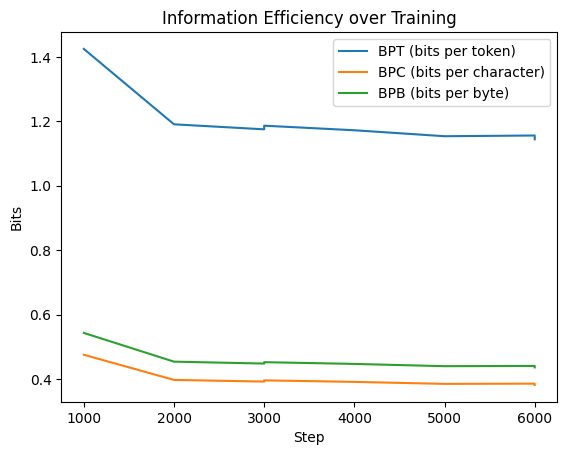

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("evaluation\metrics_evaluation\model\metrics_last_checkpoint.csv")

df_bits = df[df["bits_per_token"].notna()]

plt.figure()
plt.plot(df_bits["step"], df_bits["bits_per_token"], label="BPT (bits per token)")
plt.plot(df_bits["step"], df_bits["bits_per_character"], label="BPC (bits per character)")
plt.plot(df_bits["step"], df_bits["bits_per_byte"], label="BPB (bits per byte)")

plt.xlabel("Step")
plt.ylabel("Bits")
plt.title("Information Efficiency over Training")
plt.legend()
plt.show()



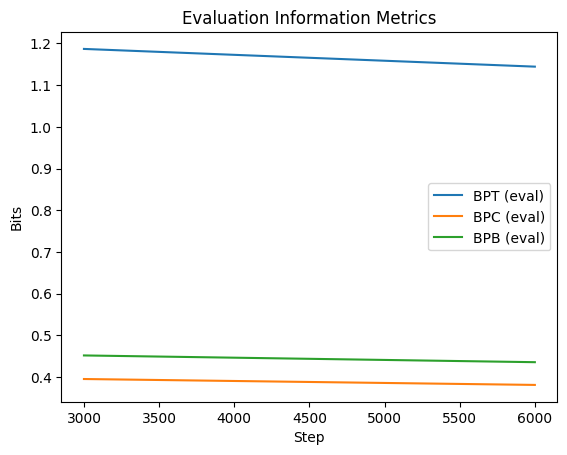

In [17]:
eval_df = df[df["eval_entropy"].notna()]

plt.figure()
plt.plot(eval_df["step"], eval_df["bits_per_token"], label="BPT (eval)")
plt.plot(eval_df["step"], eval_df["bits_per_character"], label="BPC (eval)")
plt.plot(eval_df["step"], eval_df["bits_per_byte"], label="BPB (eval)")

plt.xlabel("Step")
plt.ylabel("Bits")
plt.title("Evaluation Information Metrics")
plt.legend()
plt.show()
